<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/zoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest,mutual_info_classif,SelectPercentile,f_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/zoo.csv')

In [8]:
df_new = df.drop(['animal_name'], axis =1)

In [11]:
X = df_new.drop(['class_type'], axis = 1)
y = df_new['class_type']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [15]:
test = SelectKBest(score_func=chi2, k=len(X.columns)).fit(X,y)
np.set_printoptions(precision=3)
score  =  test.scores_

In [17]:
Y = X.columns

Text(0, 0.5, 'Features name')

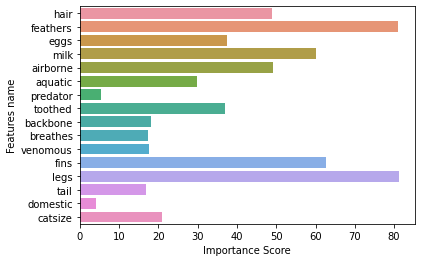

In [18]:
sns.barplot(x  = score,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

In [19]:
score

array([48.834, 81.   , 37.42 , 60.   , 49.215, 29.869,  5.431, 37.06 ,
       18.   , 17.339, 17.59 , 62.554, 81.171, 16.88 ,  4.193, 20.976])

In [22]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [23]:
rf.feature_importances_

array([0.059, 0.136, 0.106, 0.158, 0.036, 0.041, 0.018, 0.088, 0.068,
       0.053, 0.012, 0.064, 0.093, 0.053, 0.001, 0.015])

Text(0.5, 0, 'Feature Importance')

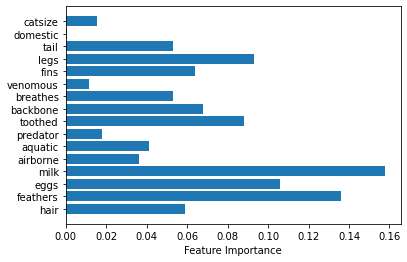

In [24]:
sort = rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

In [26]:
clf = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

In [27]:
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)

Text(0.5, 0, 'Feature Importance MEAN')

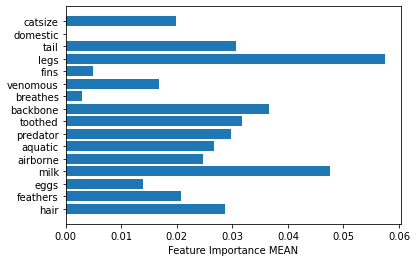

In [28]:
plt.barh(X.columns, result.importances_mean )
plt.xlabel("Feature Importance MEAN")

Text(0.5, 0, 'Feature Importance STD')

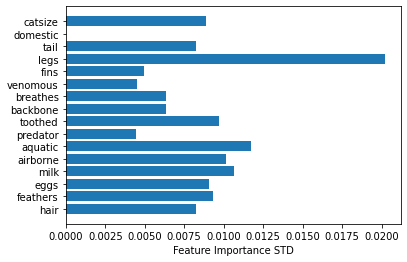

In [29]:
plt.barh(X.columns, result.importances_std)
plt.xlabel("Feature Importance STD")

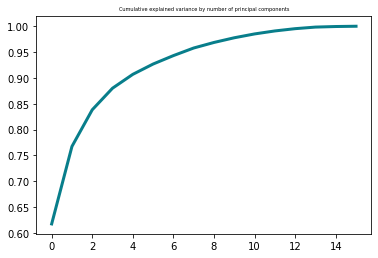

In [30]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=5)
plt.show()

In [31]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
hair,0.235536,-0.369555,-0.070887,0.105224,0.044667,0.014759,0.119674,-0.004450,-0.054551,-0.023546,-0.021805,-0.110503,0.057581,0.041122,-0.026622,0.007697
feathers,-0.097160,0.187174,-0.265549,-0.192504,0.006253,-0.019414,0.035179,0.040960,0.038803,0.035543,-0.038416,-0.008841,-0.049590,0.070548,-0.023642,-0.026779
eggs,-0.137252,0.438359,0.028989,-0.038849,-0.034068,-0.062491,-0.046915,-0.007030,0.024478,-0.090561,0.030877,-0.092010,0.069468,-0.006019,0.023638,-0.022724
milk,0.132085,-0.449584,-0.047551,0.030786,0.043295,0.004581,0.081144,-0.007455,0.024824,0.036464,-0.065008,0.031117,0.029116,-0.006231,0.050559,-0.028232
airborne,0.022362,0.234548,-0.268059,-0.028516,-0.017726,0.054993,0.202977,-0.027622,-0.079291,-0.088805,0.023548,0.021610,-0.035179,-0.049137,0.007403,0.000857


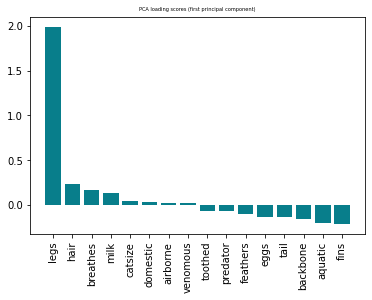

In [32]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

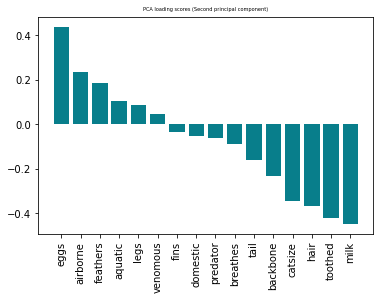

In [33]:
pc2_loadings = loadings.sort_values(by='PC2', ascending=False)[['PC2']]
pc2_loadings = pc2_loadings.reset_index()
pc2_loadings.columns = ['Attribute', 'CorrelationWithPC2']

plt.bar(x=pc2_loadings['Attribute'], height=pc2_loadings['CorrelationWithPC2'], color='#087E8B')
plt.title('PCA loading scores (Second principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [34]:
fs_fit_fscore = SelectKBest(f_classif, k=len(X.columns))
fs_fit_fscore.fit_transform(X_train, y_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(X.columns)]
fs_indices_fscore

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


array([ 8,  3,  1,  7,  2,  0,  9, 11, 13,  4, 12,  5, 15, 10,  6, 14])

In [35]:
best_features_fscore = df.columns[fs_indices_fscore].values
best_features_fscore

array(['toothed', 'eggs', 'hair', 'predator', 'feathers', 'animal_name',
       'backbone', 'venomous', 'legs', 'milk', 'fins', 'airborne',
       'domestic', 'breathes', 'aquatic', 'tail'], dtype=object)

In [36]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([    inf,     inf,     inf, 157.544,  99.432,  64.266,  54.29 ,
        42.115,  23.306,  22.346,  17.395,  10.366,  10.345,   4.37 ,
         1.988,   0.787])

Text(0, 0.5, 'Features')

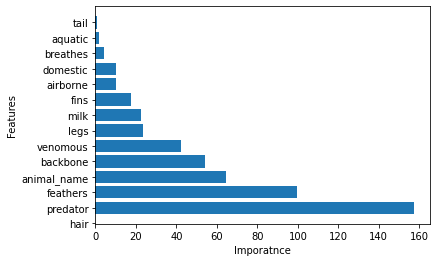

In [37]:
plt.barh(best_features_fscore, feature_importances_fscore)
plt.xlabel('Imporatnce')
plt.ylabel('Features')

In [38]:
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=len(X.columns))
fs_fit_mutual_info.fit_transform(X_train, y_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:len(X.columns)]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['fins', 'feathers', 'predator', 'toothed', 'eggs', 'backbone',
       'animal_name', 'airborne', 'hair', 'legs', 'domestic', 'milk',
       'venomous', 'aquatic', 'tail', 'breathes'], dtype=object)

In [39]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.977, 0.921, 0.918, 0.898, 0.679, 0.615, 0.574, 0.554, 0.538,
       0.528, 0.325, 0.313, 0.245, 0.185, 0.   , 0.   ])

Text(0, 0.5, 'Features')

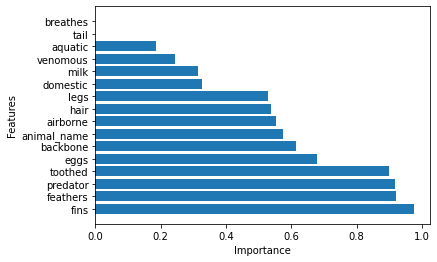

In [40]:
plt.barh(best_features_mutual_info,feature_importances_mutual_info)
plt.xlabel('Importance')
plt.ylabel('Features')

In [41]:
df_corr = df_new.corr()

In [45]:
df_corr['class_type']

hair         -0.562384
feathers     -0.197520
eggs          0.661825
milk         -0.723683
airborne      0.022677
aquatic       0.326639
predator      0.061179
toothed      -0.471527
backbone     -0.828845
breathes     -0.519308
venomous      0.321476
fins          0.099430
legs          0.131693
tail         -0.631830
domestic     -0.181043
catsize      -0.521030
class_type    1.000000
Name: class_type, dtype: float64

In [46]:
estimator = LinearSVC()
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X_train, y_train)
index = selector.ranking_.argsort()
X.columns[index]

Index(['milk', 'feathers', 'fins', 'backbone', 'airborne', 'tail', 'breathes',
       'aquatic', 'toothed', 'hair', 'venomous', 'eggs', 'predator', 'catsize',
       'legs', 'domestic'],
      dtype='object')